<a href="https://colab.research.google.com/github/alemskdlt/dl02/blob/main/project/dl02_prj01_mid_MLP_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLe: Project01 - start
- ### data: sklearn이 제공하는 당뇨병 데이터  
- ### analysis:  Keras MLP Regression 


# pandas
## MLP
    * 당뇨병 데이터 MLP 회기 분석 모형

> [참고] https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [13]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

In [14]:
#
# pandas
#
########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
# - target  a quantitative measure of disease progression one year after baseline
# [참고] https://wikidocs.net/49981
#       https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
#
########################################
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [16]:
df.shape

(442, 11)

## Check data

In [17]:
# NaN, null
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [18]:
# Duplicates
df.duplicated().sum()

0

## target의 값을 결정하는 중요한 특징
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

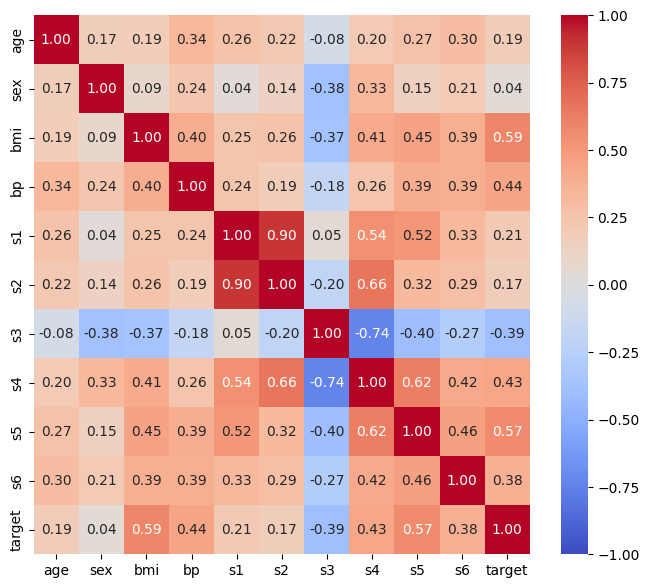

In [19]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

<Axes: >

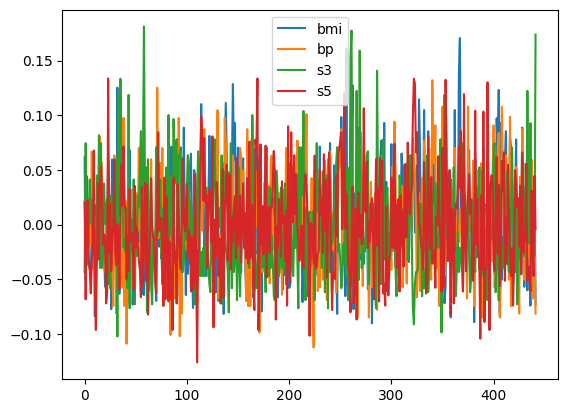

In [20]:
df[['bmi','bp','s3','s5']].plot()

<Figure size 800x800 with 0 Axes>

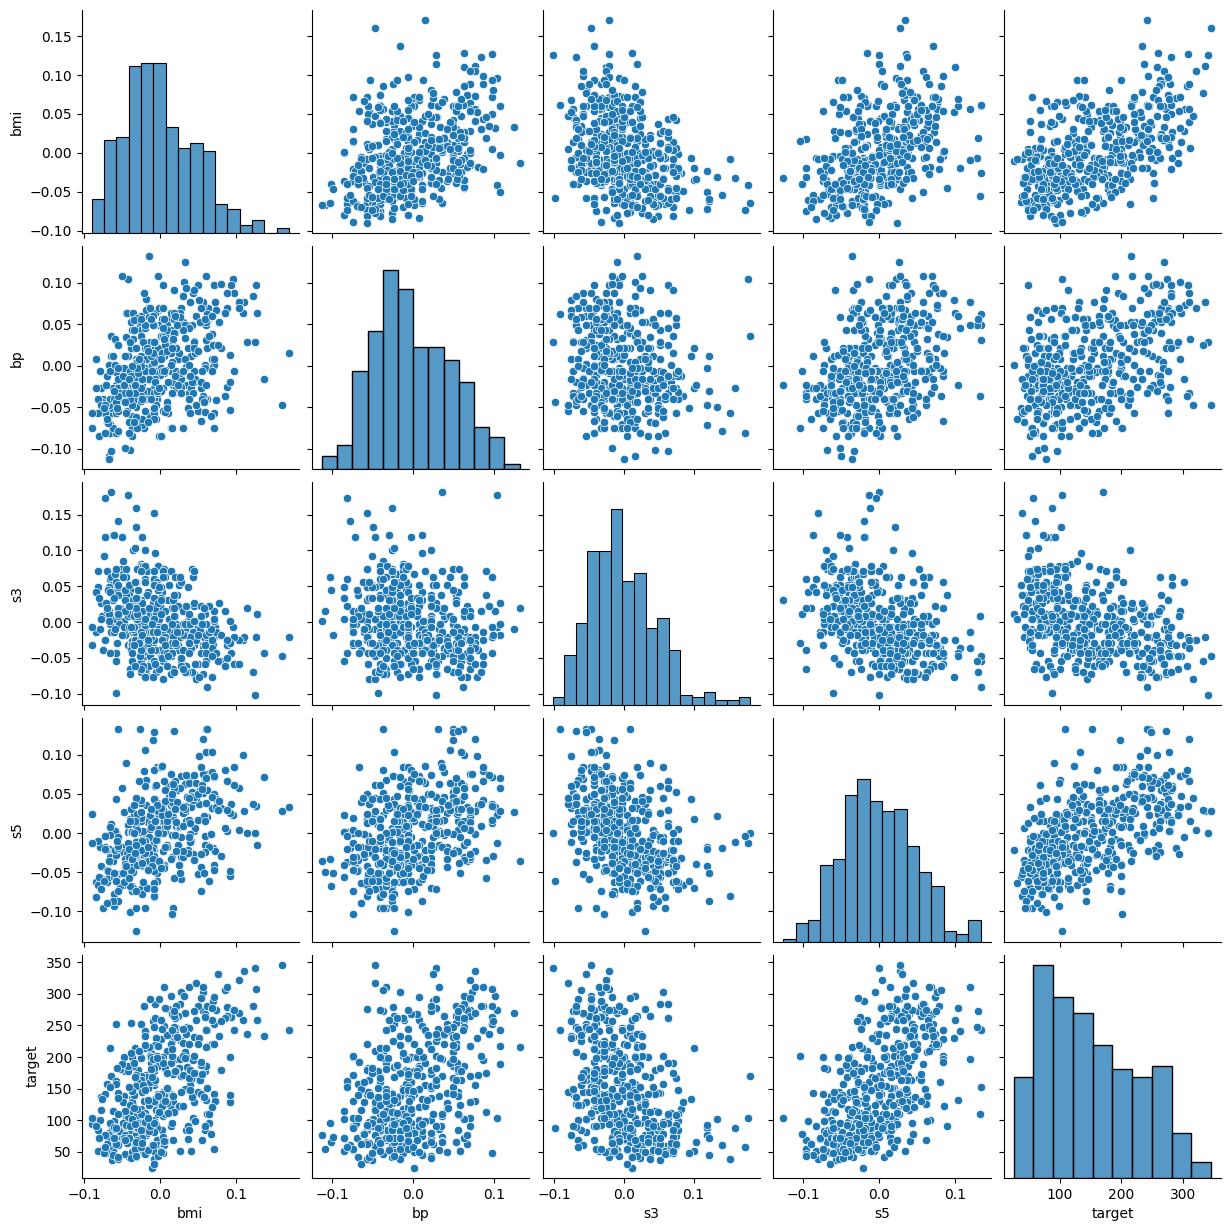

In [21]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

---

## 데이터 구성
- train data
- test data


In [22]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [23]:
X = df[['bmi', 'bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [24]:
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [25]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 4), (89, 4), (353,), (89,))

## MLP model
- Sequential model
- Functional model

In [40]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

### Sequential model

In [43]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
# model.add(Dense(16, input_shape = (X_train.shape[1],), activation = 'relu'))  # X_train.shape[1]
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


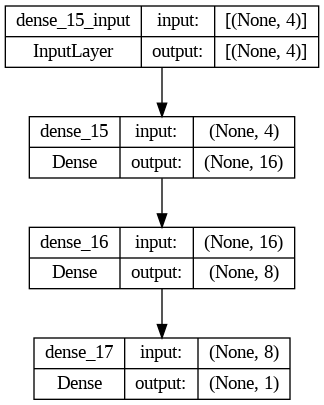

In [45]:
plot_model(model, show_shapes=True)

In [46]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31504.7441 - mse: 31504.7441 - val_loss: 22449.7754 - val_mse: 22449.7754 - 928ms/epoch - 32ms/step
Epoch 2/200
29/29 - 0s - loss: 31453.0957 - mse: 31453.0957 - val_loss: 22402.6758 - val_mse: 22402.6758 - 97ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31388.7617 - mse: 31388.7617 - val_loss: 22341.4160 - val_mse: 22341.4160 - 98ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31305.1914 - mse: 31305.1953 - val_loss: 22261.5742 - val_mse: 22261.5742 - 102ms/epoch - 4ms/step
Epoch 5/200
29/29 - 0s - loss: 31195.6836 - mse: 31195.6836 - val_loss: 22162.4648 - val_mse: 22162.4648 - 100ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 31064.7305 - mse: 31064.7305 - val_loss: 22043.2578 - val_mse: 22043.2578 - 109ms/epoch - 4ms/step
Epoch 7/200
29/29 - 0s - loss: 30905.1445 - mse: 30905.1445 - val_loss: 21899.0801 - val_mse: 21899.0801 - 111ms/epoch - 4ms/step
Epoch 8/200
29/29 - 0s - loss: 30715.9824 - mse: 30715.9824 - val_loss: 21732.2441 - val_ms

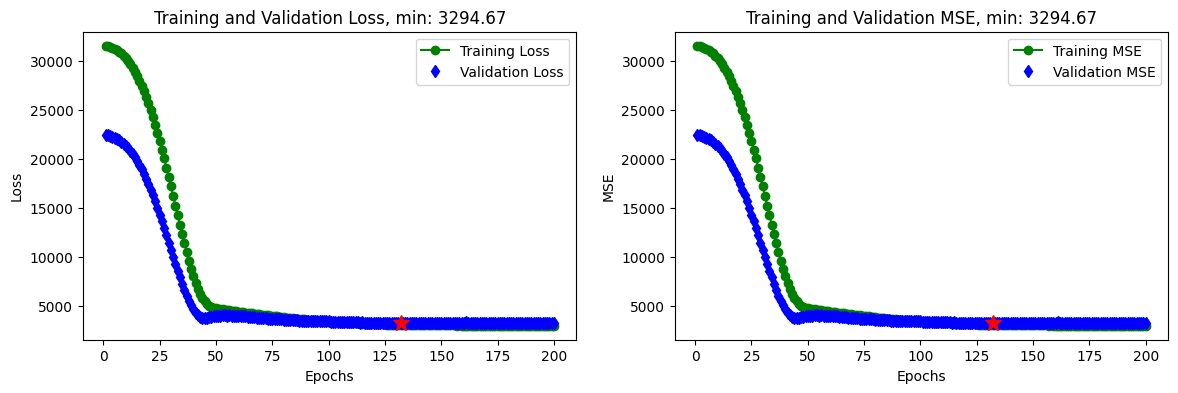

In [47]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [49]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2948.4453 - mse: 2948.4453 - 60ms/epoch - 7ms/step
테스트 세트의 MSE: 2948.45 


In [50]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline
y_pred= model.predict(X_test, batch_size=10) 
y_pred

9/9 [==============================] - 0s 2ms/step


array([[155.11232 ],
       [168.91484 ],
       [169.37946 ],
       [277.1296  ],
       [143.64847 ],
       [100.48309 ],
       [266.02707 ],
       [218.36774 ],
       [105.142365],
       [135.06783 ],
       [100.11404 ],
       [156.82756 ],
       [ 58.338345],
       [219.31593 ],
       [112.02116 ],
       [136.42953 ],
       [232.41429 ],
       [251.20522 ],
       [194.67625 ],
       [223.16487 ],
       [203.03151 ],
       [ 92.727486],
       [ 58.99483 ],
       [204.78673 ],
       [149.84627 ],
       [174.09407 ],
       [201.06015 ],
       [186.93536 ],
       [ 42.415062],
       [134.82658 ],
       [170.204   ],
       [ 91.76051 ],
       [151.19672 ],
       [193.73253 ],
       [168.79091 ],
       [219.99031 ],
       [140.8033  ],
       [141.75343 ],
       [161.23526 ],
       [ 54.2712  ],
       [ 63.236732],
       [115.55487 ],
       [174.64713 ],
       [158.68883 ],
       [173.01259 ],
       [ 62.570698],
       [ 72.88084 ],
       [ 81.1

In [51]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
r2score = r2_score(y_test, y_pred)
print(f'r2_score: {r2score}')


mean_squared_errors: 2948.4455187091085
r2_score: 0.44349545678176805


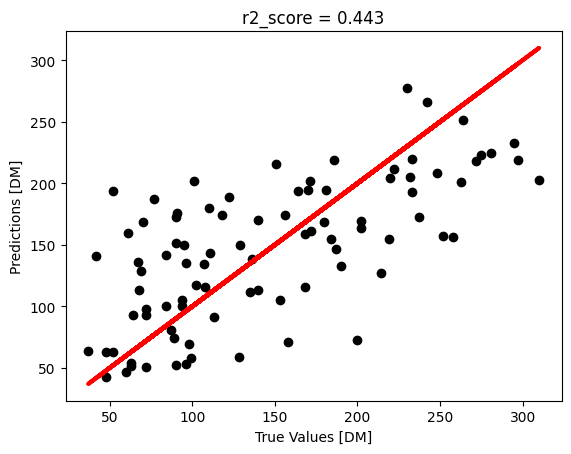

In [52]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
plt.title(f'r2_score = {np.round(r2score,3)}')
# plt.axis('equal')
# plt.axis('square')
plt.show()

## Summary
### r2_score
1. loss='mse',  optimizer ='rmsprop'  
    - 0.444 for X = df[['bmi', 'bp', 's3','s5']].values  
    - 0.452 for X = df[['bmi', 'bp', 's4','s5']].values  

2. loss='mse',  optimizer ='adam'  
    - 0.441 for X = df[['bmi', 'bp', 's3','s5']].values  
    - 0.459 for X = df[['bmi', 'bp', 's4','s5']].values  
> 반상관 특징인 s3를 정상관 특징인 s4로 대체하면 회기 성능이 개선된다.  

---
---

### [DIY] MLP Functional model을 구성해서 분석하시오.

In [35]:
# Functional model



